<a href="https://colab.research.google.com/github/Crisel8a/Probabilidad-1/blob/main/Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center" style="color: #cd7f32;"> Machine Learning Cuántico </h1>
Con ❤ por Crisel y Joules @ESFM Jornadas Académicas de Didáctica de las Ciencias 2023

# Machine Learning Clásico 


## ¿Qué es el machine Learning?
Es una rama de la *Inteligencia artificial*  que desarrolla técnicas que permitan a las máquinas aprender. Es muy común y efectivo hacer estas técnicas a base de datos más que con códigos. Mientras más datos, más preciso nuestro modelo. Este proceso iterativo de modelos online conduce a una mejora en los tipos de asociaciones hechas entre los elementos de datos. Debido a su complejidad y tamaño, estos patrones y asociaciones podrían haber sido fácilmente pasados por alto por la observación humana. Después de que un modelo ha sido entrenado, se puede utilizar en tiempo real para aprender de los datos. Las mejoras en la precisión son el resultado del proceso de entrenamiento y la automatización que forman parte del machine learning. Sin embargo, esta comprobado que el exceso de datos puede generar un daño a nuestro aprendizaje, para optimizar esto se han desarrollado diferentes técnicas de aprendizaje deendiendo del problema, por mencionar algunas:



- **Aprendizaje Supervisado**: Comenzamos con un conjunto establecido de datos bien identificados, es decir, con cierta clásificación ya determinada. Este tpo de aprendizaje tiene la intención de encontrar patrones en datos que características etiquetadas que definen su significado Por ejemplo, se puede crear una aplicación de machine learning con base en imágenes de perros y gatos y que al poner una imagen sin clásificación sepa identificar si es perro o gato.
- **Aprendizaje no Supervisado**: Se utiliza cuando el problema requiere una cantidad masiva de datos sin etiquetar. Por ejemplo, las aplicaciones de redes sociales. La comprensión del significado detrás de estos datos requiere algoritmos que clasifican los datos con base en los patrones que encuentra. El aprendizaje no supervisado lleva a cabo un proceso iterativo, analizando los datos sin intervención humana. Se utiliza con la tecnología de detección de spam en e-mails. 
- **Aprendizaje de refuerzo**: El aprendizaje de refuerzo es un modelo de aprendizaje conductual. El algoritmo recibe retroalimentación del análisis de datos, conduciendo el usuario hacia el mejor resultado. El aprendizaje de refuerzo difiere de otros tipos de aprendizaje supervisado, porque el sistema no está entrenado con el conjunto de datos de ejemplo. Más bien, el sistema aprende a través de la prueba y el error. Por lo tanto, una secuencia de decisiones exitosas conduce al fortalecimiento del proceso, porque es el que resuelve el problema de manera más efectiva.

- **Deep Learning**:El deep learning es un método específico de machine learning que incorpora las redes neuronales en capas sucesivas para aprender de los datos de manera iterativa. El deep learning es especialmente útil cuando se trata de aprender patrones de datos no estructurados. Las redes neuronales complejas de deep learning están diseñadas para emular cómo funciona el cerebro humano, así que las computadoras pueden ser entrenadas para lidiar con abstracciones y problemas mal definidos. Las redes neuronales y el deep learning se utilizan a menudo en el reconocimiento de imágenes, voz y aplicaciones de visión de computadora.

# Progrmando el Clasificador

In [3]:
!pip3 install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.5 MB/s eta 0:00:00


In [4]:
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

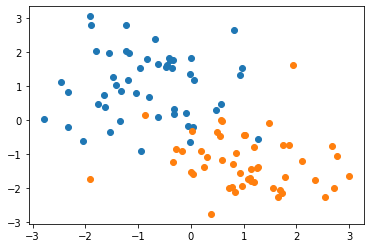

In [5]:
N = 100
A = np.array([[np.random.normal(loc=-1), np.random.normal(loc=1)] for i in range(N//2)]) 
B = np.array([[np.random.normal(loc=1), np.random.normal(loc=-1)] for i in range(N//2)]) 

plt.scatter(A[:,0], A[:,1])
plt.scatter(B[:,0], B[:,1])
plt.show()

In [6]:
feature = np.concatenate([A, B], axis=0)
label = np.concatenate([-np.ones(N // 2), np.ones(N//2)], axis=0)
data = list(zip(feature, label))

In [7]:
def model(x, w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2)

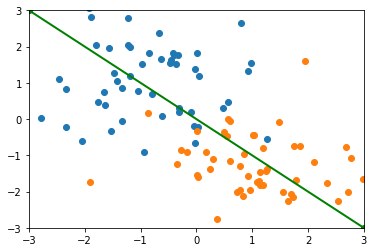

In [8]:
w = np.array([1, 1, 0], requires_grad = True)

def img_line(x, w):
    if w[1] == 0:
        w[1] = 0.0001
    return -(w[0] * x  + w[2]) / w[1]
    


def plot_model(w):
    x1, x2 = -3, 3
    plt.plot([x1, x2], [img_line(x1,w),img_line(x2,w)], 'go-', label='line 1', linewidth=2)
    plt.scatter(A[:,0], A[:,1])
    plt.scatter(B[:,0], B[:,1])
    plt.axis((-3,3,-3,3))
    plt.show()
    
plot_model(w)

In [9]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)
        

In [10]:
average_loss([1,1,0], data)

tensor(1.4327386, requires_grad=True)

In [11]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

epoch 100 loss 0.23027444669200117


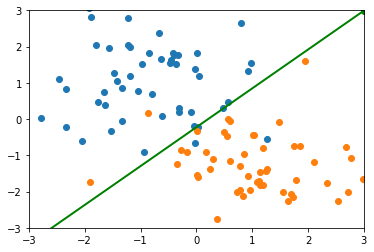

In [12]:
from IPython.display import clear_output
w = np.array([1, 1, 0], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 5 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot_model(w)
        clear_output(wait=True)